##2.4

В городе Н. правительство решило начать борьбу с превышениями скорости автомобилей. Для выбора стратегии борьбы оно сначала решило провести исследования касательно того, влияет ли используемый водителем автомобиль на среднюю скорость передвижения.

Для этого было сформировано 3 выборки по 20 человек, в каждой из которой людям выдали одинаковые автомобили марок Mitsubishi, Audi и BMW, соответственно. В течение месяца замерялась средняя скорость каждого из автомобилей (см. файл).

Каждая из пар групп была проверена двувыборочным критерием на равенство распределений, также была проведена поправка на множественность гипотез.

Требуется:

* Описать, в чём недостаток подхода правительства.

* Предложить метод для более корректного решения задачи.

* Записать формальное условие задачи.

* Решить задачу аналитически (все аналитические выкладки должны быть описаны)

In [ ]:
!wget "https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab2/2.4.csv" -O "2.4.csv"

--2020-05-16 09:24:09--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad-2020/master/lab/lab2/2.4.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227 [text/plain]
Saving to: ‘2.4.csv’

2.4.csv             100%[===================>]     227  --.-KB/s    in 0s      

2020-05-16 09:24:09 (28.4 MB/s) - ‘2.4.csv’ saved [227/227]



In [ ]:
import pandas as pd

df = pd.read_csv('2.4.csv')

##Визуализация данных по трем компаниям.

Возьмем значение превышенной скорости равным больше 80 км/ч. Проведем прямую для 80 км/ч, для значений выше нее скорость превышена.

<Figure size 432x288 with 0 Axes>

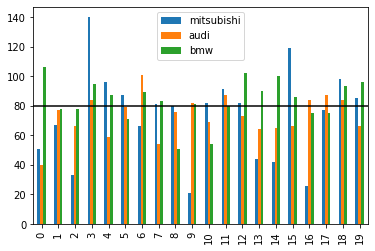

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.plot.bar()
plt.axhline(80, color='k')
plt.show()

По условию, каждая из пар групп была проверена двувыборочным критерием на равенство распределений. Недостаток подхода правительства в том, что из того, что распределения разные, не обязательно следует то, что марка автомобиля влияет на среднюю скорость движения.

In [ ]:
df.mean()

mitsubishi    73.40
audi          73.15
bmw           83.50
dtype: float64

Просто из вычисления средней скорости по таблице, видно, что в среднем на автомобилях BMW ездят со скоростью  83.5 км/ч. Но отсюда не следует, что марка автомобиля на это влияет. Проверим так ли это.

Нулевая гипотеза $H_0$: Марка не влияет на среднюю скорость;

Альтернатива $H_1$: Марка влияет на среднюю скорость;


##Проведем однофакторный дисперсионный анализ.

Его суть состоит в сравнении разброса средних значений сравниваемых выборок с разбросом значений внутри самих выборок.
То есть, чем больше отличаются средние арифметические значения сравниваемых выборок, и чем меньше разброс значений внутри выборок, тем выше вероятность различий между ними.

Статистику вычисляем по формуле $F = \frac{S^2_{межгрупповая}}{S^2_{внутригрупповая}}$, где $S^2_{межгрупповая}$ - дисперсия совокупности,
оцененная по выборочным средним, $S^2_{внутригрупповая}$ - дисперсия совокупности, оцененная по выборочным дисперсиям.

Рассчитаем:

* общее среднее = 76.7

* среднее по выборкам: 

mitsubishi = 73.4

audi = 73.15

bmw = 83.50

* Разность между средним каждой группы и общим средним:

mitsubishi  = 2.7

audi = 2.95

bmw = -7.58

Квадраты разности равны 7.25, 8.70 и 57.45 соответственно. Умножим полученные значения на
количество наблюдений (19) в каждой группе: 137.75, 165.30, 1091.45. Cуммируем полученное: 1394.6. Число степеней свободы для 3-х групп = 2. 

Отсюда значение межгрупповой дисперсии равно
$\frac{1394.6}{2} = 697.3$

Разность каждого отдельного
значения в группе от среднего значения по
группе представлены в таблице s выше. Сумма квадратов отличия от среднего = 26520.98

Число степеней свободы для 57 наблюдейний и 3х групп равно 54. Тогда значение внутригрупповой дисперсии равно $\frac{26520.98}{54} = 440.8$

Вычислим значение F статистики: $\frac{697.3}{440.8} = 1.58$

Вычислим $p-value = 0.2$

Сравним таблицное значение F критерия для уровня значимости $\alpha = 0.05$. Оно примерно равно 3.16. 
Поэтому, нулевая гипотеза не отвергается и можно сделать вывод, что марка авторобиля существенно не влияет на среднюю скорость.

Ниже приведен код для вычислений.

In [ ]:
#для удобства
data = pd.read_excel(2_4.xlsx)
data.groupby('company').mean()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats

In [ ]:
lm = ols('scores ~ company', data = data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df        sum_sq     mean_sq         F    PR(>F)
company    2.0   1394.633333  697.316667  1.581887  0.214479
Residual  57.0  25126.350000  440.813158       NaN       NaN


In [ ]:
overall_mean = data['scores'].mean()
overall_mean

76.68333333333334

In [ ]:
data['overall_mean'] = overall_mean
ss_total = sum((data['scores'] - data['overall_mean'])**2)
ss_total

26520.983333333334

In [ ]:
group_means = data.groupby('company').mean()
group_means = group_means.rename(columns = {'scores': 'group_mean'})
group_means

,group_mean,overall_mean
company,,
audi,73.15,76.683333
bmw,83.50,76.683333
mitsubishi,73.40,76.683333


In [ ]:
data = data.merge(group_means, left_on = 'company', right_index = True)

In [ ]:
ss_residual = sum((data['scores'] - data['group_mean'])**2)
ss_residual

25126.350000000002

In [ ]:
ss_explained = sum((data['overall_mean'] - data['group_mean'])**2)
ss_explained

1394.6333333333314

In [ ]:
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

440.8131578947369

In [ ]:
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

697.3166666666657

In [ ]:
F = ms_explained / ms_residual
F

1.581887142382397

In [ ]:
p_value = 1 - scipy.stats.f.cdf(F, df_explained, df_residual)
p_value

0.2144785173954088